# Year 1

## Importing modules

In [1]:
#standard libs
from math import sqrt
import random
import os

#default data science libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#modules for data preprocessing
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold
from sklearn.model_selection import RandomizedSearchCV

#classification models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

#evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier




In [2]:
from scipy.io import arff

## loading data

In [3]:
data = pd.read_excel('data/1year.xlsx')
data['B'] = (data['B'].index > 6755).astype(int)

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,B
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


# Data preprocessing

In [5]:
def set_new_headers(df):
    cols = ['X' + str(i+1) for i in range(len(df.columns)-1)]
    cols.append('Y')
    df.columns = cols

imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
mean_imputed_df = pd.DataFrame(imputer.fit_transform(data))
set_new_headers(mean_imputed_df)

data_imp = pd.DataFrame()



In [6]:
mean_imputed_df['Altman']=1.2*mean_imputed_df['X3']+1.4*mean_imputed_df['X6']+3.3*mean_imputed_df['X7']+0.6*mean_imputed_df['X8']+mean_imputed_df['X9']

In [7]:
mean_imputed_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Y,Altman
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0,3.780650
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0,3.716428
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0,2.911624
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0,3.243063
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0,2.690244


In [8]:
Y = mean_imputed_df['Y'].values
mean_imputed_df.drop('Y', axis=1, inplace=True)
X = mean_imputed_df.values

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(2)
tsne_all = tsne.fit_transform(X,Y)

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context('notebook', font_scale=1.5,
                rc={"lines.linewidth": 2.5})

from sklearn.manifold import TSNE

def scatter(x, labels, nfile, subtitle=None):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", n_class))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[labels.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(n_class):
        # Position of each label.
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
        
    if subtitle != None:
        plt.suptitle(subtitle)
    plt.savefig("../data/" + nfile+ ".jpg", dpi=400)     
    plt.show()

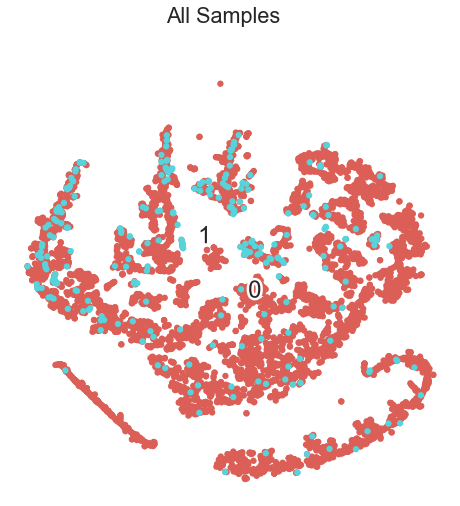

In [11]:
n_class=2
scatter(tsne_all, Y, 'Bancru', "All Samples")

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=10)

In [13]:
#cross validation
nfolds = 10
nclass = 2
ntrain = X_train.shape[0]
ntest = X_test.shape[0]

cross_val = StratifiedKFold(nfolds)

# Creating model objects
## Tuning model hyperparameters

### Logistic regression

In [14]:
log_reg = LogisticRegression()

log_reg_params = {"C": [0.45, 0.5, 0.55],
                 "solver": ['newton-cg']}

lr_grid = GridSearchCV(log_reg, log_reg_params, cv=cross_val, refit=True, verbose=1, n_jobs=4)

lr_grid.fit(X_train, y_train)
lr_best_est = lr_grid.best_estimator_

print("Accuracy (LogisticRegression): {} with params {}".format(lr_grid.best_score_, lr_best_est))


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   12.4s finished


Accuracy (LogisticRegression): 0.9607564050427003 with params LogisticRegression(C=0.45, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


## Decision tree

In [15]:
d_tree = DecisionTreeClassifier()
d_tree_params = {'criterion': ['gini'],
                'max_depth': [50, 60, 70],
                'max_leaf_nodes': [90,100, 110]}

dt_grid = GridSearchCV(d_tree, d_tree_params, cv=cross_val, refit=True, verbose=1, n_jobs=4)
dt_grid.fit(X_train, y_train)

dt_best_est = dt_grid.best_estimator_
print("Accuracy (Decision tree): {} with params {}".format(dt_grid.best_score_, dt_best_est))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    6.7s finished


Accuracy (Decision tree): 0.9638064253761692 with params DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=90,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


## Random forest

In [16]:
r_forest = RandomForestClassifier()
r_forest_params = {'n_estimators': [150],
                'criterion': ['gini'],
                'max_depth': [25],
                'max_features': [64],
                'max_leaf_nodes': [10],
                'bootstrap': [True]}

#r_forest_grid = GridSearchCV(r_forest, r_forest_params, cv=cross_val, refit=True, verbose=1, n_jobs=4)
#r_forest_grid.fit(X_train_sm, y_train_sm)
rf_random_grid = RandomizedSearchCV(r_forest, r_forest_params, cv=cross_val, refit=True, verbose=1, n_jobs=-1)
rf_random_grid.fit(X_train, y_train)

rf_best_est = rf_random_grid.best_estimator_
print("Accuracy (Random forest): {} with params {}".format(rf_random_grid.best_score_, rf_best_est))

Fitting 10 folds for each of 1 candidates, totalling 10 fits


C:\Developement\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   32.9s finished


Accuracy (Random forest): 0.975396502643351 with params RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features=64, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## SVM

In [17]:
#
# SVM classifier в разработке
#


#svm = SVC()
#svm_params = {'kernel': ['linear', 'poly'],
#                'probability': [True],
#                'decision_function_shape': ['ovo']}

#svm_grid = GridSearchCV(svm, svm_params, cv=cross_val, refit=True, verbose=1, n_jobs=-1)
#svm_grid.fit(X_train_sm, y_train_sm)

#svm_grid = RandomizedSearchCV(svm, svm_params, cv=cross_val, refit=True, verbose=1, n_jobs=-1)
#svm_grid.fit(X_train_sm, y_train_sm)

#svm_best_est = svm_grid.best_estimator_
#print("Accuracy (SVM): {} with params {}".format(svm_grid.best_score_, svm_best_est))

## XGboost

In [18]:
xgboost = xgb.XGBClassifier()
xg_params = {'n_estimators': [150],
    'booster': ['gbtree', 'gblinear'],
    #'eta': [0.3, 0,5],
    'objective': ['binary:logitraw'],
    'gamma':[0,1],
    'max_depth': [8],
    'learning_rate': [0.1, 0.15]
}

#xgb_grid = GridSearchCV(xgboost, xg_params, cv=cross_val, refit=True, verbose=1, n_jobs=4)
#xgb_grid.fit(X_train_sm, y_train_sm)

xgb_grid = RandomizedSearchCV(xgboost, xg_params, cv=cross_val, refit=True, verbose=1, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

xgb_best_est = xgb_grid.best_estimator_
print("Accuracy (XGboosting): {} with params {}".format(xgb_grid.best_score_, xgb_best_est))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


C:\Developement\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   50.6s finished


Accuracy (XGboosting): 0.9800732004880033 with params XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logitraw', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


# Second level

In [19]:
def show_feature_importance(model, features, model_name):
    plt.figure(figsize=(12,8))
    results=pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
    results=results.sort_values('importance', ascending=False)
    results.head(70)
#     results.head(20).plot(x = 'feature', y = 'importance', kind = 'barh',
#                      color = 'red', edgecolor = 'k', title = 'Feature Importances of ' + model_name)
    return results

In [20]:
ntrain=X_train.shape[0]
ntest = X_test.shape[0]
nclass = 2
SEED = 42
NFOLDS = 10
print(ntrain, ntest)
kf = KFold(n_splits=NFOLDS, random_state=SEED, shuffle=True)
labels = ['Normal','Bankruptcy']

4918 2109


In [21]:
def BuildModel(best_alg, X_train, y_train, X_test, kf, ntrain, ntest, nclass, NfOLDS):
    Xr_train = np.zeros((ntrain, nclass))
    Xr_test = np.zeros((ntest, nclass))
    tr_ind = np.arange(ntrain)
    for i, (ttrain, ttest) in enumerate(kf.split(tr_ind)):
        clf = best_alg
        clf.fit(X_train[ttrain], y_train[ttrain])
        sc = clf.score(X_train[ttest], y_train[ttest])
        print(i, 'accuracy', sc)
        Xr_train[ttest] = clf.predict_proba(X_train[ttest])
        Xr_test += clf.predict_proba(X_test)/NFOLDS
    
    return Xr_train, Xr_test


def BuildModelNot(best_alg, X_train, y_train, X_test, kf, ntrain, ntest, nclass, NfOLDS):
    Xr_train = np.zeros((ntrain, nclass))
    Xr_test = np.zeros((ntest, nclass))
    tr_ind = np.arange(ntrain)
    
    for i, (ttrain, ttest) in enumerate(kf.split(tr_ind)):
        clf = best_alg
        clf.fit(X_train[ttrain], y_train[ttrain])
        sc = clf.score(X_train[test], y_train[ttest])
        print(i, 'accuracy', sc)
        Xr_train[ttest] = clf.predict_proba(X_train[ttest])
        Xr_test += clf.predict_proba(X_test, validate_features=False)/NFOLDS
    
    return Xr_train, Xr_test

In [22]:
def show_accuracy(Xr, y, labels, best, nclass):
    pred=[]
    for x in Xr:
        if x > best:
            pred.append(1)
        else:
            pred.append(0)
    print(classification_report(y,pred, target_names=labels, digits=4))
    print(confusion_matrix(y, pred, labels=range(nclass)))

In [23]:
def show_auc(y_train_set, pred_train_set):
    thresholds = np.linspace(0.01, 0.5, 1000)
    f1_sc = np.array([f1_score(y_train_set, pred_train_set[:,1] > thr) for thr in thresholds])
    plt.figure(figsize=(12,8))
    plt.plot(thresholds, f1_sc, linewidth=4)
    plt.ylabel("F1 score", fontsize=18)
    plt.xlabel("Threshold", fontsize=18)
    
    best_model_f1 = thresholds[f1_sc.argmax()]
    
    return best_model_f1

In [24]:
X_train

array([[ 3.2686000e-02,  7.8427000e-01,  1.8252000e-01, ...,
         6.7497000e+00,  1.5938000e+02,  5.8272748e+00],
       [ 1.5175000e-01,  1.7291000e-02,  8.5753000e-01, ...,
         5.6911000e+01,  7.8611000e+00,  3.7852327e+01],
       [ 9.9280000e-03,  3.0102000e-01,  1.7986000e-02, ...,
         1.2158000e+01,  1.2701000e+00,  2.2406740e+00],
       ...,
       [ 1.7070000e-02,  3.2454000e-01,  2.0180000e-01, ...,
         3.8812000e+00,  1.4320000e+00,  2.7428112e+00],
       [ 3.3260000e-03,  2.9576000e-01, -5.0182000e-02, ...,
         4.6327000e+00,  1.8162000e+00,  2.5887524e+00],
       [ 1.1304000e-01,  4.8799000e-01,  4.4636000e-01, ...,
         5.0937000e+00,  1.2885000e+01,  3.5592840e+00]])

## Logistic regression

In [25]:
lr_best = LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
pred_train, pred_test=BuildModel(lr_best, X_train, y_train, X_test,kf, ntrain, ntest, nclass, NFOLDS)

C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


0 accuracy 0.9532520325203252


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


1 accuracy 0.9634146341463414


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


2 accuracy 0.9573170731707317


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


3 accuracy 0.9410569105691057


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


4 accuracy 0.959349593495935


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


5 accuracy 0.9573170731707317


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


6 accuracy 0.975609756097561


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


7 accuracy 0.9654471544715447


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


8 accuracy 0.9592668024439919
9 accuracy 0.9775967413441955


C:\Developement\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


0.17283950617283952
0.08191919191919192


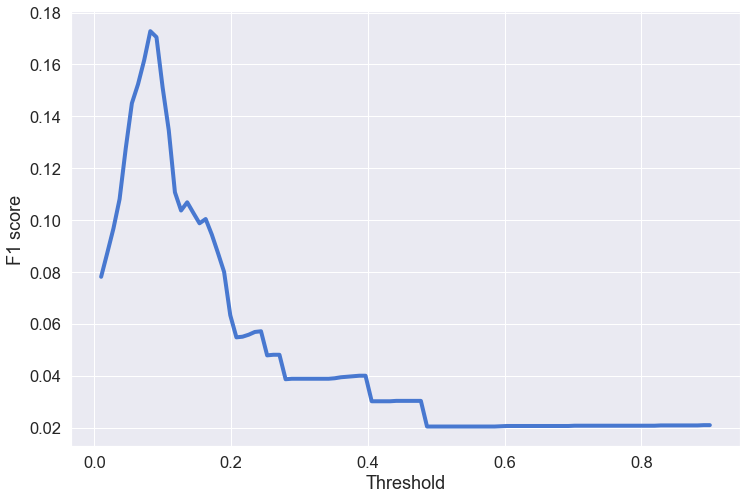

In [26]:
thresholds = np.linspace(0.01, 0.9, 100)
f1_sc = np.array([f1_score(y_train,pred_train[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
best_lr = thresholds[f1_sc.argmax()]
print(f1_sc.max())
print(best_lr)

In [27]:
show_accuracy(pred_train[:,1],y_train, labels, best_lr, nclass)

              precision    recall  f1-score   support

      Normal     0.9694    0.9449    0.9570      4735
  Bankruptcy     0.1386    0.2295    0.1728       183

    accuracy                         0.9183      4918
   macro avg     0.5540    0.5872    0.5649      4918
weighted avg     0.9385    0.9183    0.9278      4918

[[4474  261]
 [ 141   42]]


In [28]:
show_accuracy(pred_test[:,1],y_test, labels, best_lr, nclass)

              precision    recall  f1-score   support

      Normal     0.9661    0.9579    0.9620      2021
  Bankruptcy     0.1905    0.2273    0.2073        88

    accuracy                         0.9275      2109
   macro avg     0.5783    0.5926    0.5846      2109
weighted avg     0.9337    0.9275    0.9305      2109

[[1936   85]
 [  68   20]]


## Decision tree

In [29]:
dt_best = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=150,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
pred_train_dt, pred_test_dt=BuildModel(dt_best, X_train, y_train, X_test,kf, ntrain, ntest, nclass, NFOLDS)

0 accuracy 0.967479674796748
1 accuracy 0.9573170731707317
2 accuracy 0.9613821138211383
3 accuracy 0.959349593495935
4 accuracy 0.967479674796748
5 accuracy 0.967479674796748
6 accuracy 0.9654471544715447
7 accuracy 0.9552845528455285
8 accuracy 0.9674134419551935
9 accuracy 0.955193482688391


0.5118733509234829
0.01


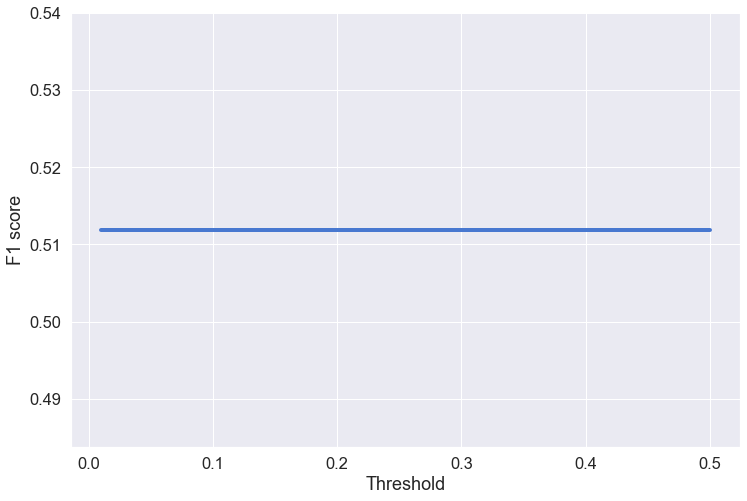

In [30]:
thresholds = np.linspace(0.01, 0.5, 100)
f1_sc_dt = np.array([f1_score(y_train,pred_train_dt[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc_dt, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
best_dt_f1 = thresholds[f1_sc_dt.argmax()]
print(f1_sc_dt.max())
print(best_dt_f1)

In [31]:
show_accuracy(pred_train_dt[:,1],y_train, labels, best_dt_f1, nclass)

              precision    recall  f1-score   support

      Normal     0.9818    0.9791    0.9804      4735
  Bankruptcy     0.4949    0.5301    0.5119       183

    accuracy                         0.9624      4918
   macro avg     0.7383    0.7546    0.7462      4918
weighted avg     0.9637    0.9624    0.9630      4918

[[4636   99]
 [  86   97]]


In [32]:
show_accuracy(pred_test_dt[:,1],y_test, labels, best_dt_f1, nclass)

              precision    recall  f1-score   support

      Normal     0.9886    0.9005    0.9425      2021
  Bankruptcy     0.2500    0.7614    0.3764        88

    accuracy                         0.8947      2109
   macro avg     0.6193    0.8310    0.6595      2109
weighted avg     0.9578    0.8947    0.9189      2109

[[1820  201]
 [  21   67]]


In [33]:
print(mean_imputed_df.columns[:-1])

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64'],
      dtype='object')


In [34]:
show_feature_importance(dt_best, mean_imputed_df.columns, 'Decision tree')

,feature,importance
33,X34,0.239201
26,X27,0.113393
10,X11,0.091439
57,X58,0.081646
45,X46,0.050601
...,...,...
15,X16,0.000000
13,X14,0.000000
9,X10,0.000000
6,X7,0.000000


<Figure size 864x576 with 0 Axes>

## Random forest

In [35]:
rf_best = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features=64, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

pred_train_rf, pred_test_rf = BuildModel(rf_best, X_train, y_train, X_test,kf, ntrain, ntest, nclass, NFOLDS)

0 accuracy 0.967479674796748
1 accuracy 0.9735772357723578
2 accuracy 0.9695121951219512
3 accuracy 0.975609756097561
4 accuracy 0.983739837398374
5 accuracy 0.9796747967479674
6 accuracy 0.9817073170731707
7 accuracy 0.9776422764227642
8 accuracy 0.9775967413441955
9 accuracy 0.9816700610997964


f1 score of random forest:  0.6351351351351351
0.2733333333333334


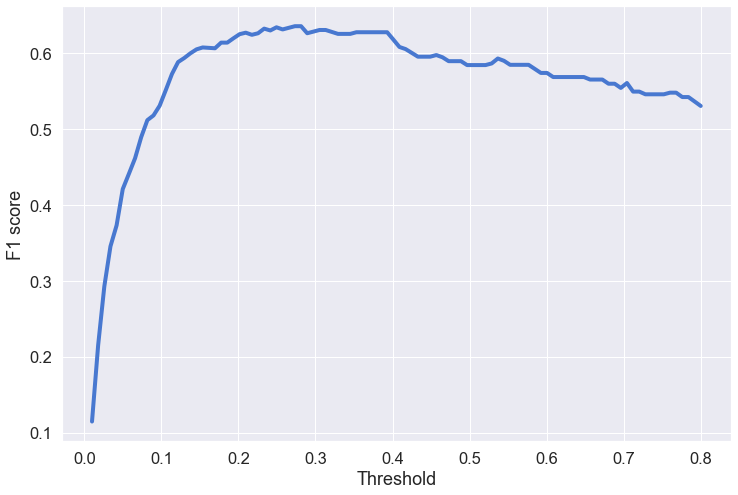

In [36]:
thresholds = np.linspace(0.01, 0.8, 100)
f1_sc_rf = np.array([f1_score(y_train,pred_train_rf[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc_rf, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
best_rf_f1 = thresholds[f1_sc_rf.argmax()]
print('f1 score of random forest: ', f1_sc_rf.max())
print(best_rf_f1)

In [37]:
show_accuracy(pred_train_rf[:,1],y_train, labels, best_rf_f1, nclass)

              precision    recall  f1-score   support

      Normal     0.9815    0.9960    0.9887      4735
  Bankruptcy     0.8319    0.5137    0.6351       183

    accuracy                         0.9780      4918
   macro avg     0.9067    0.7548    0.8119      4918
weighted avg     0.9759    0.9780    0.9755      4918

[[4716   19]
 [  89   94]]


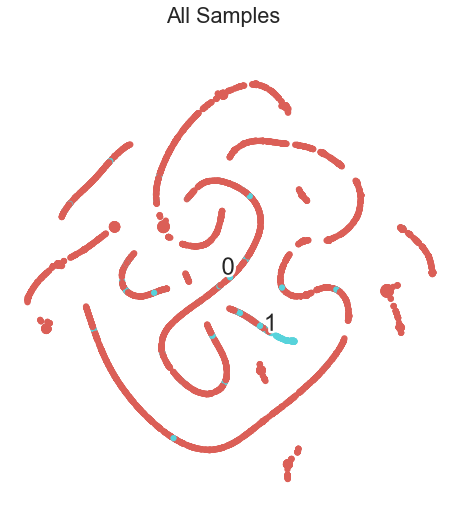

In [38]:
tsne = TSNE(2)
tsne_train_rf = tsne.fit_transform(pred_train_rf, y_train)
n_class=2
scatter(tsne_train_rf, y_train, 'Bancr_train_rf', "All Samples")

In [39]:
show_accuracy(pred_test_rf[:,1],y_test, labels, best_rf_f1, nclass)

              precision    recall  f1-score   support

      Normal     0.9819    0.9946    0.9882      2021
  Bankruptcy     0.8226    0.5795    0.6800        88

    accuracy                         0.9772      2109
   macro avg     0.9023    0.7871    0.8341      2109
weighted avg     0.9753    0.9772    0.9753      2109

[[2010   11]
 [  37   51]]


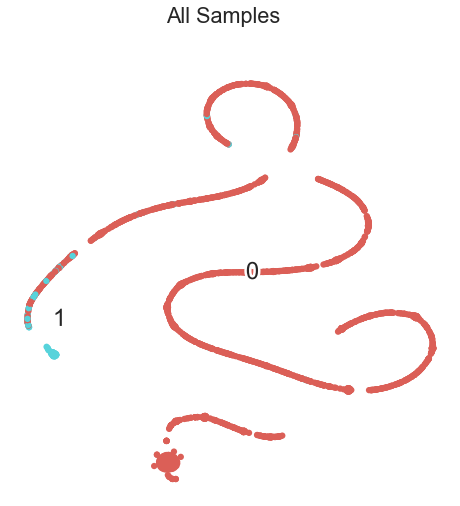

In [40]:
tsne = TSNE(2)
tsne_test_rf = tsne.fit_transform(pred_test_rf, y_train)
n_class=2
scatter(tsne_test_rf, y_test, 'Bancr_test_rf', "All Samples")

In [41]:
show_feature_importance(rf_best, mean_imputed_df.columns, 'Random forest')

,feature,importance
8,X9,0.193792
26,X27,0.160100
33,X34,0.155120
10,X11,0.075334
55,X56,0.039538
...,...,...
47,X48,0.001522
51,X52,0.001388
13,X14,0.001206
16,X17,0.000945


<Figure size 864x576 with 0 Axes>

## Xgboost

In [42]:
xgb_best = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logitraw', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

pred_train_xgb, pred_test_xgb = BuildModel(xgb_best, X_train, y_train, X_test, kf, ntrain, ntest, nclass, NFOLDS)

0 accuracy 0.975609756097561
1 accuracy 0.975609756097561
2 accuracy 0.9715447154471545
3 accuracy 0.9796747967479674
4 accuracy 0.983739837398374
5 accuracy 0.9776422764227642
6 accuracy 0.983739837398374
7 accuracy 0.983739837398374
8 accuracy 0.9775967413441955
9 accuracy 0.9816700610997964


0.6476868327402134


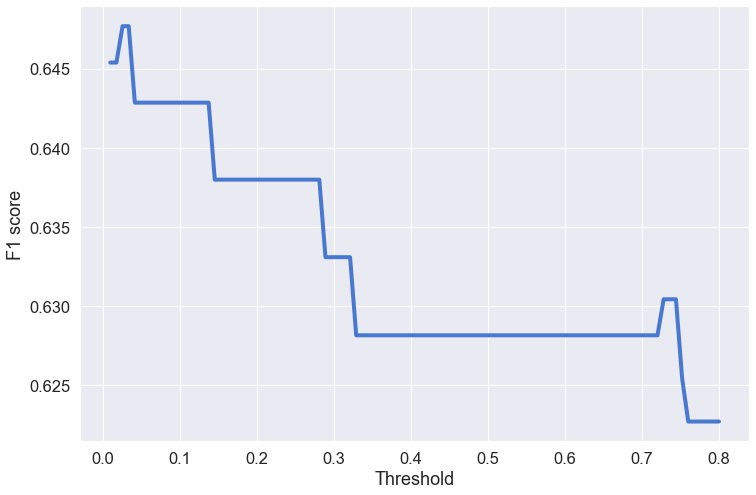

In [43]:
thresholds = np.linspace(0.01, 0.8, 100)
f1_sc_xgb = np.array([f1_score(y_train,pred_train_xgb[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc_xgb, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
best_thr_xgb = thresholds[f1_sc_xgb.argmax()]
print(f1_sc_xgb.max())

In [44]:
show_accuracy(pred_train_xgb[:,1],y_train, labels, best_thr_xgb, nclass)

              precision    recall  f1-score   support

      Normal     0.9809    0.9985    0.9896      4735
  Bankruptcy     0.9286    0.4973    0.6477       183

    accuracy                         0.9799      4918
   macro avg     0.9547    0.7479    0.8187      4918
weighted avg     0.9790    0.9799    0.9769      4918

[[4728    7]
 [  92   91]]


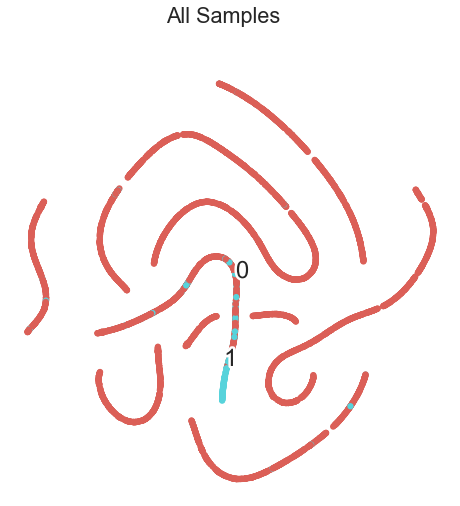

In [45]:
tsne = TSNE(2)
tsne_train_xgb = tsne.fit_transform(pred_train_xgb, y_train)
n_class=2
scatter(tsne_train_xgb, y_train, 'Bancr_train_xgb', "All Samples")

In [46]:
show_accuracy(pred_test_xgb[:,1],y_test, labels, best_thr_xgb, nclass)

              precision    recall  f1-score   support

      Normal     0.9801    1.0000    0.9900      2021
  Bankruptcy     1.0000    0.5341    0.6963        88

    accuracy                         0.9806      2109
   macro avg     0.9901    0.7670    0.8431      2109
weighted avg     0.9809    0.9806    0.9777      2109

[[2021    0]
 [  41   47]]


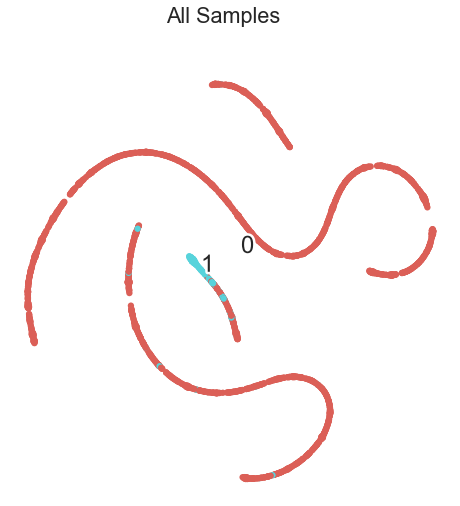

In [47]:
tsne = TSNE(2)
tsne_test_xgb = tsne.fit_transform(pred_test_xgb, y_train)
n_class=2
scatter(tsne_test_xgb, y_test, 'Bancr_test_xgb', "All Samples")

In [48]:
show_feature_importance(xgb_best, mean_imputed_df.columns, 'XGboost')

,feature,importance
55,X56,0.050908
33,X34,0.050156
10,X11,0.049495
8,X9,0.039048
26,X27,0.030354
...,...,...
13,X14,0.000000
16,X17,0.000000
17,X18,0.000000
59,X60,0.000000


<Figure size 864x576 with 0 Axes>

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()

lda.fit(X_train, y_train)
pred_train_lda, pred_test_lda = BuildModel(lda, X_train, y_train, X_test,kf, ntrain, ntest, nclass, NFOLDS)

0 accuracy 0.9552845528455285
1

C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


 accuracy 0.9735772357723578
2 accuracy 0.9552845528455285
3 accuracy 0.9471544715447154
4 accuracy 0.959349593495935
5 accuracy 0.9512195121951219


C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


6 accuracy 0.9715447154471545
7 accuracy 0.9654471544715447
8 accuracy 0.9653767820773931
9 accuracy 0.9755600814663951


C:\Developement\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.24096385542168675


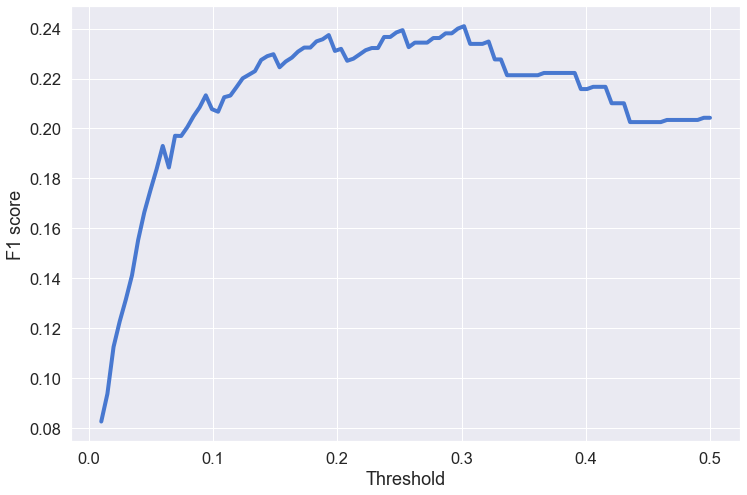

In [22]:
thresholds = np.linspace(0.01, 0.5, 100)
f1_sc_lda = np.array([f1_score(y_train,pred_train_lda[:,1] > thr) for thr in thresholds])
plt.figure(figsize=(12,8))
plt.plot(thresholds, f1_sc_lda, linewidth=4 )
plt.ylabel("F1 score", fontsize=18)
plt.xlabel("Threshold", fontsize=18)
best_thr_lda = thresholds[f1_sc_lda.argmax()]
print(f1_sc_lda.max())

In [23]:
show_accuracy(pred_train_lda[:,1],y_train, labels, best_thr_lda, nclass)

              precision    recall  f1-score   support

      Normal     0.9685    0.9924    0.9803      4735
  Bankruptcy     0.4545    0.1639    0.2410       183

    accuracy                         0.9616      4918
   macro avg     0.7115    0.5782    0.6106      4918
weighted avg     0.9493    0.9616    0.9528      4918

[[4699   36]
 [ 153   30]]


In [24]:
show_accuracy(pred_test_lda[:,1],y_test, labels, best_thr_lda, nclass)

              precision    recall  f1-score   support

      Normal     0.9621    0.9926    0.9771      2021
  Bankruptcy     0.3750    0.1023    0.1607        88

    accuracy                         0.9554      2109
   macro avg     0.6686    0.5474    0.5689      2109
weighted avg     0.9376    0.9554    0.9430      2109

[[2006   15]
 [  79    9]]
